## Accessing Text Corpora and Lexical Resources

### Selected Corpora

#### Gutenberg Corpus

In [1]:
import nltk
from nltk.corpus import gutenberg
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [2]:
emma = nltk.corpus.gutenberg.words('austen-emma.txt')
print(type(emma))
len(emma)

<class 'nltk.corpus.reader.util.StreamBackedCorpusView'>


192427

In [3]:
for fileid in gutenberg.fileids():
    words = gutenberg.words(fileid)
    total_len = len(words)
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(words)
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
    print(round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab), fileid, total_len)

5 25 26 austen-emma.txt 192427
5 26 17 austen-persuasion.txt 98171
5 28 22 austen-sense.txt 141576
4 34 79 bible-kjv.txt 1010654
5 19 5 blake-poems.txt 8354
4 19 14 bryant-stories.txt 55563
4 18 12 burgess-busterbrown.txt 18963
4 20 13 carroll-alice.txt 34110
5 20 12 chesterton-ball.txt 96996
5 23 11 chesterton-brown.txt 86063
5 18 11 chesterton-thursday.txt 69213
4 21 25 edgeworth-parents.txt 210663
5 26 15 melville-moby_dick.txt 260819
5 52 11 milton-paradise.txt 96825
4 12 9 shakespeare-caesar.txt 25833
4 12 8 shakespeare-hamlet.txt 37360
4 12 7 shakespeare-macbeth.txt 23140
5 36 12 whitman-leaves.txt 154883


Finding the longest sentence in a text:

In [4]:
macbeth_sents = gutenberg.sents('shakespeare-macbeth.txt')
longest_len = max(len(s) for s in macbeth_sents)
longest_sents = [s for s in macbeth_sents if len(s) >= longest_len]
print(len(longest_sents))
' '.join(longest_sents[0])

1


"Doubtfull it stood , As two spent Swimmers , that doe cling together , And choake their Art : The mercilesse Macdonwald ( Worthie to be a Rebell , for to that The multiplying Villanies of Nature Doe swarme vpon him ) from the Westerne Isles Of Kernes and Gallowgrosses is supply ' d , And Fortune on his damned Quarry smiling , Shew ' d like a Rebells Whore : but all ' s too weake : For braue Macbeth ( well hee deserues that Name ) Disdayning Fortune , with his brandisht Steele , Which smoak ' d with bloody execution ( Like Valours Minion ) caru ' d out his passage , Till hee fac ' d the Slaue : Which neu ' r shooke hands , nor bad farwell to him , Till he vnseam ' d him from the Naue toth ' Chops , And fix ' d his Head vpon our Battlements"

#### Web and Chat Text
- Firefox discussion forums
- conversations overheard in New York
- Pirates of the Carribean script
- personal ads
- wine reviews

In [5]:
from nltk.corpus import webtext
for fileid in webtext.fileids():
    print(fileid, webtext.raw(fileid)[:65], '...')

firefox.txt Cookie Manager: "Don't allow sites that set removed cookies to se ...
grail.txt SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop ...
overheard.txt White guy: So, do you have any plans for this evening?
Asian girl ...
pirates.txt PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terr ...
singles.txt 25 SEXY MALE, seeks attrac older single lady, for discreet encoun ...
wine.txt Lovely delicate, fragrant Rhone wine. Polished leather and strawb ...


In [6]:
from nltk.corpus import nps_chat
chatroom = nps_chat.posts('10-19-20s_706posts.xml')
chatroom[123]

['i',
 'do',
 "n't",
 'want',
 'hot',
 'pics',
 'of',
 'a',
 'female',
 ',',
 'I',
 'can',
 'look',
 'in',
 'a',
 'mirror',
 '.']

#### The Brown Corpus
The first electronic corpus >= a million words.  
It was created in 1961.

In [7]:
from nltk.corpus import brown
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [8]:
brown.words(categories='news')

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [9]:
brown.words(fileids=['ca16'])

['Romantic', 'news', 'concerns', 'Mrs.', 'Joan', ...]

In [10]:
brown.sents(categories=['news', 'editorial', 'reviews'])

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

The study of systematic differences between genres is known as **stylistics**.  
Some basic stylistic analysis:

In [13]:
news_text = brown.words(categories='news')
news_fdist = nltk.FreqDist(w.lower() for w in news_text)
modals = ['can', 'could', 'may', 'might', 'must', 'will']
q_words = ['who', 'what', 'when', 'where', 'why', 'how']
for m in modals:
    print(f"{m}: {news_fdist[m]}")
for q in q_words:
    print(f"{q}: {news_fdist[q]}")

can: 94
could: 87
may: 93
might: 38
must: 53
will: 389
who: 268
what: 95
when: 169
where: 59
why: 14
how: 42


In [15]:
conditional_f_dist = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
conditional_f_dist.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


#### Reuters Corpus
News documents organized into 90 overlapping topics, totaling 1.3m words.  
Split by training and test data (for training on guessing the correct topics).

In [18]:
from nltk.corpus import reuters
reuters.fileids()[:5]

['test/14826', 'test/14828', 'test/14829', 'test/14832', 'test/14833']

In [20]:
reuters.categories()[:7]

['acq', 'alum', 'barley', 'bop', 'carcass', 'castor-oil', 'cocoa']

In [21]:
reuters.categories('training/9865')

['barley', 'corn', 'grain', 'wheat']

In [22]:
reuters.categories(['training/9865', 'training/9880'])

['barley', 'corn', 'grain', 'money-fx', 'wheat']

In [24]:
reuters.fileids('barley')[:5]

['test/15618', 'test/15649', 'test/15676', 'test/15728', 'test/15871']

In [26]:
reuters.fileids(['barley', 'corn'])[:5]

['test/14832', 'test/14858', 'test/15033', 'test/15043', 'test/15106']

In [27]:
reuters.words('training/9865')[:14]

['FRENCH',
 'FREE',
 'MARKET',
 'CEREAL',
 'EXPORT',
 'BIDS',
 'DETAILED',
 'French',
 'operators',
 'have',
 'requested',
 'licences',
 'to',
 'export']

In [28]:
reuters.words(categories='barley')

['FRENCH', 'FREE', 'MARKET', 'CEREAL', 'EXPORT', ...]

#### Inaugural Address Corpus
Ordered by year.

In [32]:
from nltk.corpus import inaugural
print(inaugural.fileids()[:4])
print(inaugural.fileids()[-4:])

['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt']
['2009-Obama.txt', '2013-Obama.txt', '2017-Trump.txt', '2021-Biden.txt']


<Axes: xlabel='Samples', ylabel='Counts'>

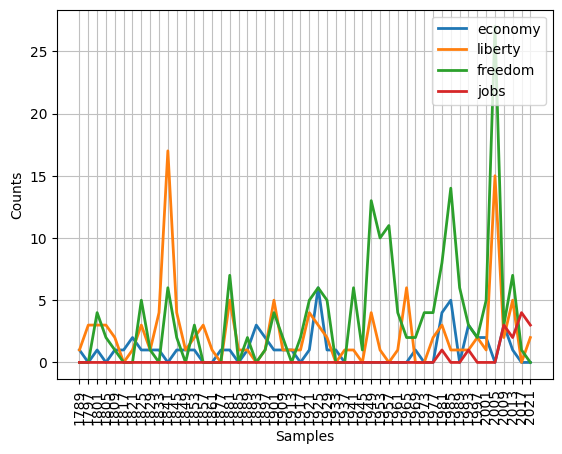

In [37]:
ia_cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['liberty', 'freedom', 'jobs', 'economy']
    if w.lower().startswith(target))
ia_cfd.plot()

#### Corpora in other languages